## Higher concentrations of Nephrin, Nck and NWASP produce large clusters. This bifurcated cluster size distribution is an indication of phase transition.

In [1]:
# Package import
from NFsim_data_analyzer import *
from DataViz_NFsim import * 
from MultiRun_BNG import * 

In [2]:
# bngl file (BioNetGen model) 
bng_file = './test_dataset/Nephrin_Nck_NWASP_high_concentration.bngl'

# Initialization of the Simulation Object
simObj = BNG_multiTrials(bng_file, t_end=0.02, steps=20, numRuns=20)
print(simObj)
simObj.runTrials(delSim=False)
print()


***** // ***** 
Class : BNG_multiTrials
File Path : ./test_dataset/Nephrin_Nck_NWASP_high_concentration.bngl

t_end : 0.02 seconds 	 output_steps : 20
Number of runs: 20

Molecules: ['NWASP', 'Nck', 'Nephrin']
Number of binding sites: [6, 4, 3]
Species Counts: [300.0, 900.0, 450.0]

NFsim progress : [****************************************] 100%
Execution time : 4 mins 58 secs



In [5]:
# analyze data across multiple trials
outpath = simObj.getOutPath()
molecules, numSite, counts, _ = simObj.getMolecules()
nfsObj = NFSim_output_analyzer(outpath)
print(nfsObj)
nfsObj.process_gdatfiles()
nfsObj.process_speciesfiles(molecules, counts, numSite)


***** // ***** 
Class : NFSim_output_analyzer
System : Nephrin_Nck_NWASP_high_concentration
Total Trajectories : 20

Processing gdat_files : [****************************************] 100%

Observables:  {0: 'time', 1: 'tot_Nck', 2: 'free_Nck', 3: 'tot_NWASP', 4: 'free_NWASP', 5: 'tot_Nephrin', 6: 'free_Nephrin', 7: 'fully_bound_Nephrin', 8: 'fully_bound_Nck', 9: 'fully_bound_NWASP', 10: 'cluster_neph_nck_nw', 11: 'cluster_nck_nw'}

Processing species_files : [****************************************] 100%


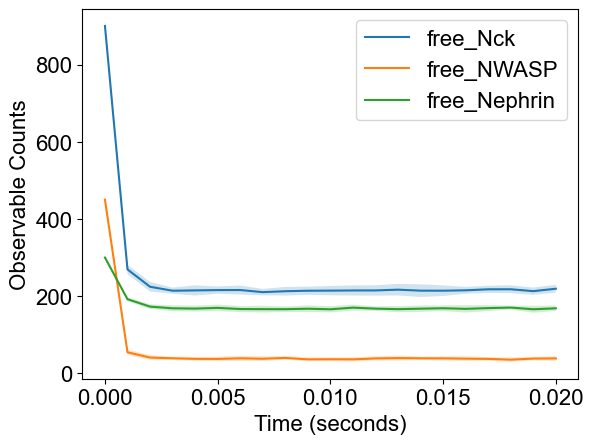

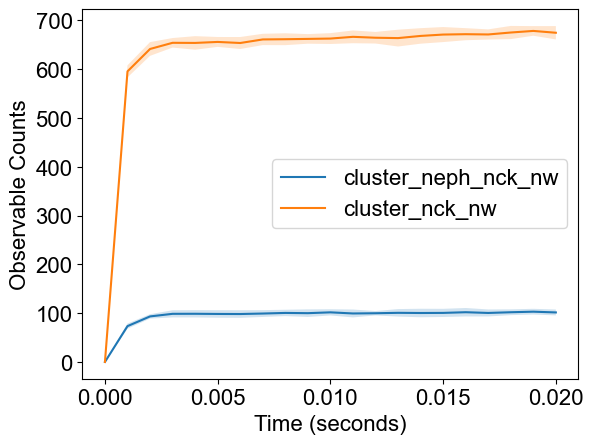

In [6]:
# Visualization
# indexList for observables
plotTimeCourse(outpath, obsList=[2,4,6])
plotTimeCourse(outpath, obsList=[10,11])

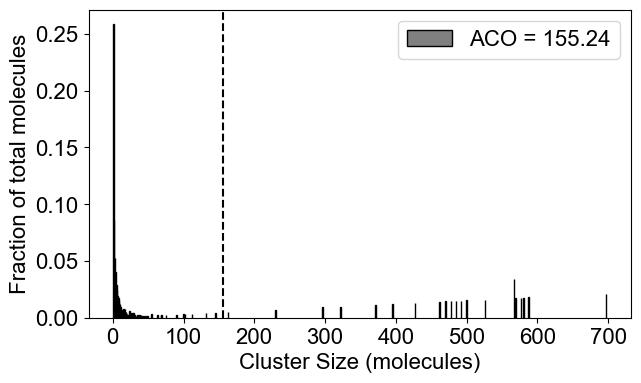

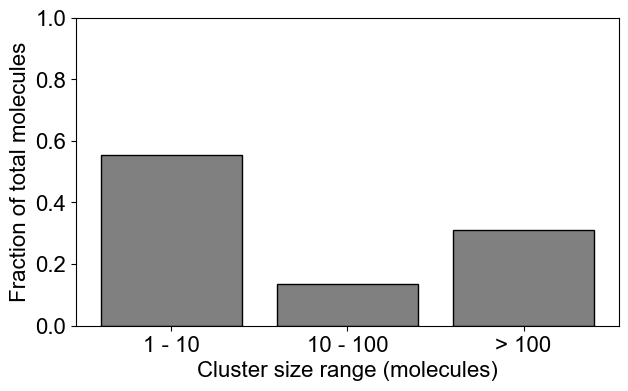

In [7]:
# 2A: Cluster size distribution (ACO: Average Cluster Occupancy)
plotClusterDist(outpath)
# Binned distribution by providing cluster size ranges
plotClusterDist(outpath, sizeRange=[1,10,100])

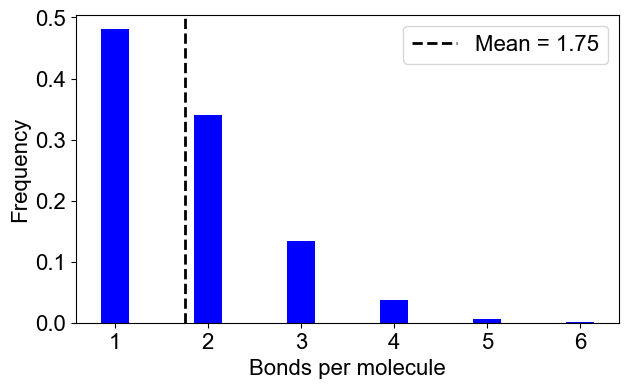

In [8]:
# 2B: Number of bonds per molecule
plotBondsPerMolecule(outpath)

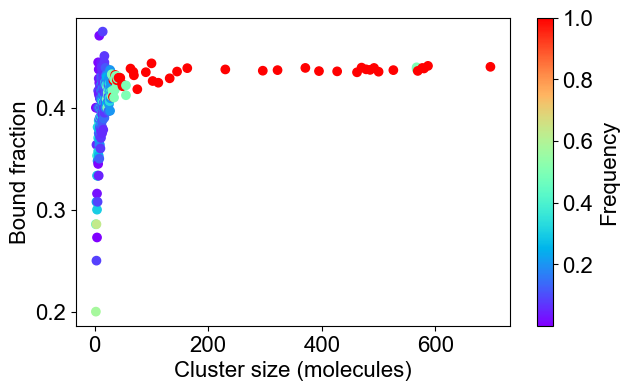

In [9]:
# 2C: Bound fraction distribution
plotBoundFraction(outpath)

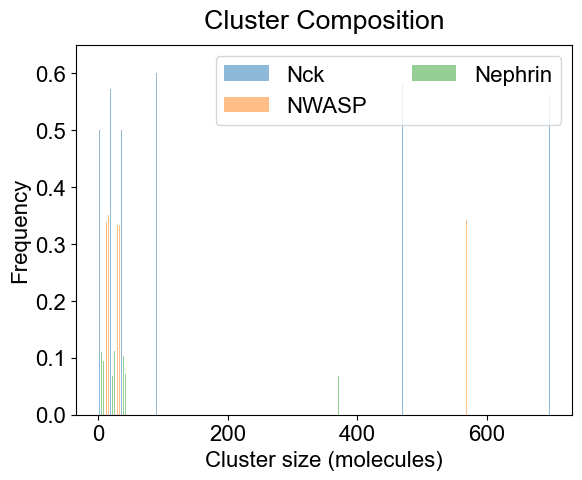

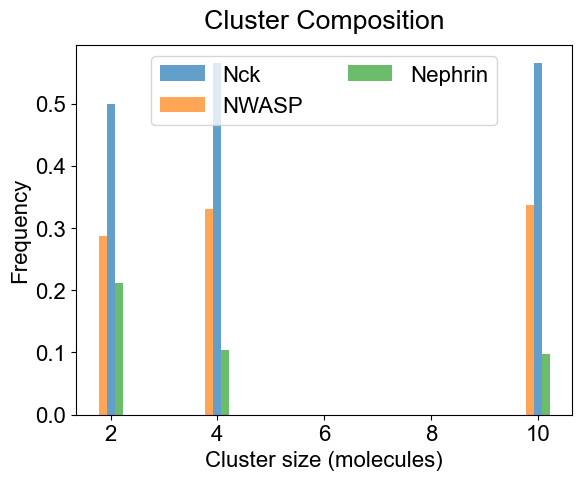

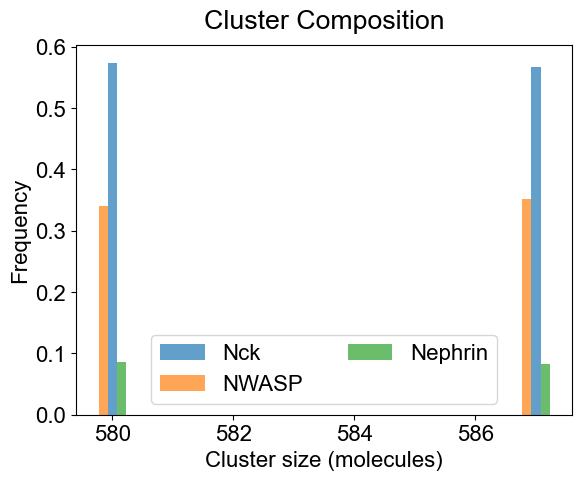

In [12]:
# 3A. Average composition of indivual clusters. 
# Default is all the clusters present in the system. As before, adjust width and transparency (alpha) for visual clarity.
plotClusterComposition(outpath, specialClusters=[], width=0.15, alpha=0.5)

# You can look at the composition of a set of clusters (specialClusters) also
plotClusterComposition(outpath, specialClusters=[2, 4, 10], width=0.15, alpha=0.7)

plotClusterComposition(outpath, specialClusters=[580, 587], width=0.15, alpha=0.7)

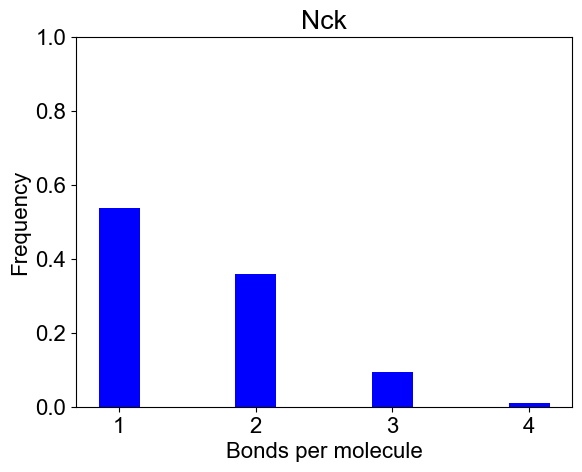

In [11]:
# 3B. Bondcount distribution of each molecular type 
# plotBondCounts(outpath, molecules=molecules) # Reading molecules from previous block

# You may provide a subset of molecules also
plotBondCounts(outpath, molecules=['Nck'])